In [1]:
import pandas as pd
from scipy.spatial import distance
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize
from scipy.stats import zscore
#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,6.0,14.0,2.0,5.0,0.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,5.0,10.0,5.0,8.0,-2.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-18,4.0,6.0,11.0,4.0,8.0,-2.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-19,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167652,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-27,-93.0,NaN,NaN,NaN,-59.0,21.0
167653,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-28,-43.0,35.0,NaN,-33.0,-30.0,11.0
167654,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-29,-46.0,36.0,NaN,-34.0,-29.0,12.0
167655,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-30,-48.0,17.0,NaN,-27.0,-26.0,11.0


In [2]:
df20=df20.dropna(axis=1,how='all')
df20=df20.drop(df20.columns[[0,1,2, 3,4,5, 6]], axis = 1)
df20["residential_percent_change_from_baseline"].isna().sum()

df20["retail_and_recreation_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["grocery_and_pharmacy_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["parks_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["transit_stations_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["residential_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20["workplaces_percent_change_from_baseline"].fillna( method ='ffill', inplace = True)
df20


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2.0,3.0,-11.0,-4.0,7.0,1.0
1,7.0,6.0,14.0,2.0,5.0,0.0
2,6.0,5.0,10.0,5.0,8.0,-2.0
3,4.0,6.0,11.0,4.0,8.0,-2.0
4,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...
167652,-93.0,-77.0,-72.0,-84.0,-59.0,21.0
167653,-43.0,35.0,-72.0,-33.0,-30.0,11.0
167654,-46.0,36.0,-72.0,-34.0,-29.0,12.0
167655,-48.0,17.0,-72.0,-27.0,-26.0,11.0


In [3]:
sample_z=df20.apply(zscore)
sample_z

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0.955066,-0.296920,-0.272972,0.708549,1.205640,-0.905493
1,1.132844,-0.220730,0.176959,0.890091,1.112608,-1.042642
2,1.097288,-0.246126,0.104970,0.980862,1.252157,-1.316941
3,1.026177,-0.220730,0.122967,0.950605,1.252157,-1.316941
4,0.883955,-0.296920,0.032981,0.829577,1.298673,-1.316941
...,...,...,...,...,...,...
167652,-2.422717,-2.328664,-1.370805,-1.712011,-1.864434,1.837500
167653,-0.644936,0.515778,-1.370805,-0.168904,-0.515462,0.466004
167654,-0.751603,0.541174,-1.370805,-0.199161,-0.468946,0.603153
167655,-0.822715,0.058635,-1.370805,0.012638,-0.329397,0.466004


In [4]:
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 1.5 * df[variable].std()
    lower_limit = df[variable].mean() - 1.5 * df[variable].std()
    return upper_limit, lower_limit

In [5]:
upper_limit, lower_limit = outlier_removal(sample_z, "retail_and_recreation_percent_change_from_baseline")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

upper_limit1, lower_limit1 = outlier_removal(sample_z, "grocery_and_pharmacy_percent_change_from_baseline")
print("Upper limit: ", upper_limit1)
print("Lower Limit: ",lower_limit1)

upper_limit2, lower_limit2 = outlier_removal(sample_z, "parks_percent_change_from_baseline")
print("Upper limit: ", upper_limit2)
print("Lower Limit: ",lower_limit2)

upper_limit3, lower_limit3 = outlier_removal(sample_z, "transit_stations_percent_change_from_baseline")
print("Upper limit: ", upper_limit3)
print("Lower Limit: ",lower_limit3)

upper_limit4, lower_limit4 = outlier_removal(sample_z, "workplaces_percent_change_from_baseline")
print("Upper limit: ", upper_limit4)
print("Lower Limit: ",lower_limit4)

upper_limit5, lower_limit5 = outlier_removal(sample_z, "residential_percent_change_from_baseline")
print("Upper limit: ", upper_limit5)
print("Lower Limit: ",lower_limit5)

Upper limit:  1.5000044734389921
Lower Limit:  -1.5000044734389917
Upper limit:  1.500004473438715
Lower Limit:  -1.5000044734387132
Upper limit:  1.50000447343904
Lower Limit:  -1.5000044734390374
Upper limit:  1.500004473439183
Lower Limit:  -1.5000044734391258
Upper limit:  1.5000044734387432
Lower Limit:  -1.500004473438745
Upper limit:  1.5000044734385478
Lower Limit:  -1.5000044734385474


In [6]:
sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] < lower_limit) | (sample_z['retail_and_recreation_percent_change_from_baseline'] > upper_limit)]
sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < lower_limit1) | (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] > upper_limit1)]
sample_z[(sample_z['parks_percent_change_from_baseline'] < lower_limit2) | (sample_z['parks_percent_change_from_baseline'] > upper_limit2)]
sample_z[(sample_z['transit_stations_percent_change_from_baseline'] < lower_limit3) | (sample_z['transit_stations_percent_change_from_baseline'] > upper_limit3)]
sample_z[(sample_z['workplaces_percent_change_from_baseline'] < lower_limit4) | (sample_z['workplaces_percent_change_from_baseline'] > upper_limit4)]
sample_z[(sample_z['residential_percent_change_from_baseline'] < lower_limit5) | (sample_z['residential_percent_change_from_baseline'] > upper_limit5)]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
39,-1.178271,-0.931840,-0.758898,-0.834558,-1.120174,1.563201
40,-1.142715,-0.881047,-0.650915,-0.834558,-1.120174,1.563201
41,-1.213826,-0.906443,-0.794893,-0.895072,-1.213206,1.974650
42,-1.462715,-1.058824,-1.100846,-1.076614,-0.980625,1.700350
44,-1.142715,-0.982634,-0.776896,-0.925329,-1.306239,1.837500
...,...,...,...,...,...,...
167638,-2.458272,-2.404855,-1.370805,-1.742268,-2.050499,1.837500
167644,-2.422717,-2.354061,-1.370805,-0.895072,-2.329597,2.523248
167645,-2.458272,-2.354061,-1.370805,-1.681754,-2.050499,1.837500
167651,-2.422717,-2.328664,-1.370805,-1.712011,-2.190048,2.523248


In [7]:
sample_z =sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] > lower_limit) & (sample_z['retail_and_recreation_percent_change_from_baseline'] < upper_limit)]
sample_z =sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline']> lower_limit1) & (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < upper_limit1)]
sample_z =sample_z[(sample_z['parks_percent_change_from_baseline'] >lower_limit2) & (sample_z['parks_percent_change_from_baseline'] < upper_limit2)]
sample_z =sample_z[(sample_z['transit_stations_percent_change_from_baseline'] > lower_limit3) & (sample_z['transit_stations_percent_change_from_baseline'] < upper_limit3)]
sample_z =sample_z[(sample_z['workplaces_percent_change_from_baseline'] > lower_limit4) & (sample_z['workplaces_percent_change_from_baseline'] < upper_limit4)]
sample_z =sample_z[(sample_z['residential_percent_change_from_baseline'] > lower_limit5) & (sample_z['residential_percent_change_from_baseline'] < upper_limit5)]

In [8]:
##data without outlier
'''sample_z = sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] > lower) & (sample_z['retail_and_recreation_percent_change_from_baseline'] < upper)]
sample_z = sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline'] > lower1) & (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < upper1)]
sample_z = sample_z[(sample_z['parks_percent_change_from_baseline'] > lower2) & (sample_z['parks_percent_change_from_baseline'] < upper2)]
sample_z = sample_z[(sample_z['transit_stations_percent_change_from_baseline'] > lower3) & (sample_z['transit_stations_percent_change_from_baseline'] < upper3)]
sample_z = sample_z[(sample_z['workplaces_percent_change_from_baseline'] > lower4) & (sample_z['workplaces_percent_change_from_baseline'] < upper4)]
sample_z = sample_z[(sample_z['residential_percent_change_from_baseline'] > lower5) & (sample_z['residential_percent_change_from_baseline'] < upper5)]
'''

"sample_z = sample_z[(sample_z['retail_and_recreation_percent_change_from_baseline'] > lower) & (sample_z['retail_and_recreation_percent_change_from_baseline'] < upper)]\nsample_z = sample_z[(sample_z['grocery_and_pharmacy_percent_change_from_baseline'] > lower1) & (sample_z['grocery_and_pharmacy_percent_change_from_baseline'] < upper1)]\nsample_z = sample_z[(sample_z['parks_percent_change_from_baseline'] > lower2) & (sample_z['parks_percent_change_from_baseline'] < upper2)]\nsample_z = sample_z[(sample_z['transit_stations_percent_change_from_baseline'] > lower3) & (sample_z['transit_stations_percent_change_from_baseline'] < upper3)]\nsample_z = sample_z[(sample_z['workplaces_percent_change_from_baseline'] > lower4) & (sample_z['workplaces_percent_change_from_baseline'] < upper4)]\nsample_z = sample_z[(sample_z['residential_percent_change_from_baseline'] > lower5) & (sample_z['residential_percent_change_from_baseline'] < upper5)]\n"

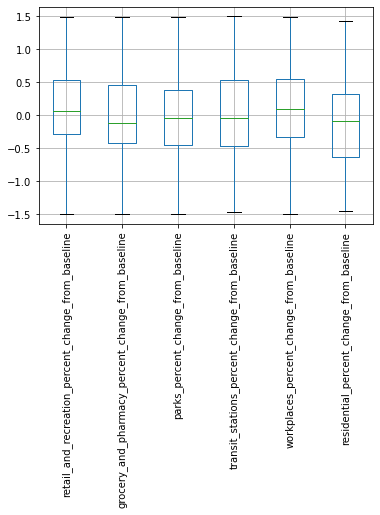

In [8]:
sample_z.boxplot(['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline' , 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'], rot=90)

Text(0, 0.5, 'avg_distribution')

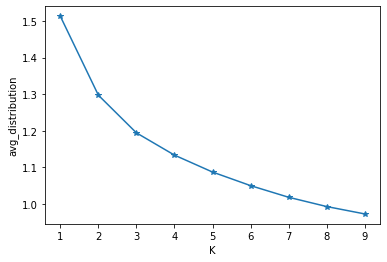

In [9]:
from scipy.spatial.distance import cdist
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
  model = KMeans(n_clusters = k)
  model.fit(sample_z)
  prediction = model.predict(sample_z)
  meanDistortions.append(sum(np.min(cdist(sample_z, model.cluster_centers_, 'euclidean'), axis = 1)) /sample_z
    .shape[0])
  
plt.plot(clusters, meanDistortions, "*-")
plt.xlabel('K')
plt.ylabel('avg_distribution')

cluster name retail, percentage of cluster in whole data 23.50% 
cluster name grocery, percentage of cluster in whole data 17.76% 
cluster name parks, percentage of cluster in whole data 13.87% 
cluster name transit, percentage of cluster in whole data 17.75% 
cluster name workplaces, percentage of cluster in whole data 15.52% 
cluster name residential, percentage of cluster in whole data 11.61% 


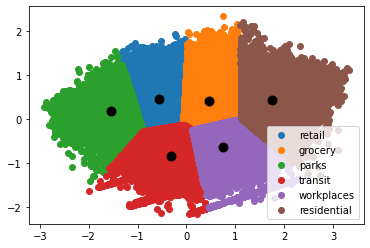

In [11]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = sample_z
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
##
sample_z['kmean'] = kmeans.labels_
cluster_count = sample_z['kmean'].value_counts()
cluster_count_sum = cluster_count.sum()
custer_count_sorted = cluster_count.sort_index()

#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
#plotting the results:
columns = ["retail", "grocery", "parks", "transit", "workplaces", "residential"]
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label =columns[i])
    print ('cluster name {}, percentage of cluster in whole data {:.2f}% '.format(columns[i],(custer_count_sorted[i]*100)/cluster_count_sum))
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()